In [91]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_df = pd.merge(mouse_drug_df, clinical_trial_df, how='outer', on='Mouse ID')


# Display the data table for preview

combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [92]:
mouse_drug_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [93]:
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [94]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol_data = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
mean_tumor_vol_data_df = pd.DataFrame({"Tumor Volume (mm3)" : mean_tumor_vol_data})
# Preview DataFrame
mean_tumor_vol_data_df.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421

In [95]:
mean_tumor_vol_data_df.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [96]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_vol_data = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
sem_tumor_vol_data_df = pd.DataFrame({"Tumor Volume (mm3)" : sem_tumor_vol_data})
# Preview DataFrame

sem_tumor_vol_data_df.reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [97]:
# Minor Data Munging to Re-Format the Data Frames
#reformat_combined_df = combined_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
reformat_mean_combined_df = mean_tumor_vol_data_df.pivot_table('Tumor Volume (mm3)', 'Timepoint', 'Drug')
reformat_sem_combined_df = sem_tumor_vol_data_df.pivot_table('Tumor Volume (mm3)', 'Timepoint', 'Drug')

# Preview that Reformatting worked
#reformat_mean_combined_df.head()
reformat_mean_combined_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


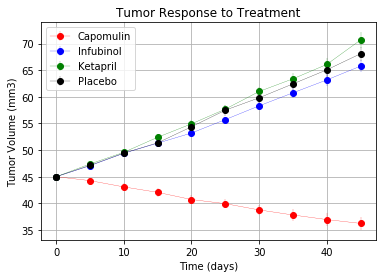

<Figure size 432x288 with 0 Axes>

In [98]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(reformat_sem_combined_df.index, reformat_mean_combined_df['Capomulin'], yerr=reformat_sem_combined_df['Capomulin'], fmt="-", 
            color="r",marker="o",linewidth=0.25, label="Capomulin")
ax.errorbar(reformat_sem_combined_df.index, reformat_mean_combined_df['Infubinol'], yerr=reformat_sem_combined_df['Infubinol'], fmt="-", 
            color="b",marker="o",linewidth=0.25, label="Infubinol")
ax.errorbar(reformat_sem_combined_df.index, reformat_mean_combined_df['Ketapril'], yerr=reformat_sem_combined_df['Ketapril'], fmt="-", 
            color="g",marker="o",linewidth=0.25, label="Ketapril")
ax.errorbar(reformat_sem_combined_df.index, reformat_mean_combined_df['Placebo'], yerr=reformat_sem_combined_df['Placebo'], fmt="-", 
            color="k",marker="o",linewidth=0.25, label="Placebo")
# Save the Figure

ax.set_ylabel("Tumor Volume (mm3)")
ax.set_xlabel("Time (days)")
ax.legend(loc="upperleft")
plt.title("Tumor Response to Treatment")
plt.grid()
plt.show()
plt.savefig("tumor-response.png")

## Metastatic Response to Treatment

In [99]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site_data = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
mean_met_site_data_df = pd.DataFrame(mean_met_site_data)
# Preview DataFrame
mean_met_site_data_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [100]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met_site_data = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
sem_met_site_data_df = pd.DataFrame(sem_met_site_data)
# Preview DataFrame
sem_met_site_data_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [101]:
# Minor Data Munging to Re-Format the Data Frames
reformat_met_mean_combined_df = mean_met_site_data_df.pivot_table('Metastatic Sites', 'Timepoint', 'Drug')
reformat_met_sem_combined_df = sem_met_site_data_df.pivot_table('Metastatic Sites', 'Timepoint', 'Drug')
# Preview that Reformatting worked
reformat_met_mean_combined_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


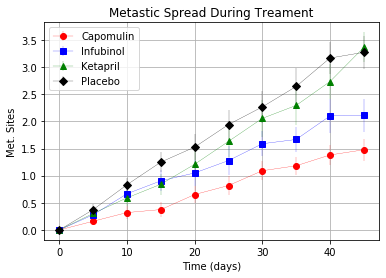

<Figure size 432x288 with 0 Axes>

In [109]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(reformat_met_mean_combined_df.index, reformat_met_mean_combined_df['Capomulin'], yerr=reformat_met_sem_combined_df['Capomulin'], fmt="-", 
            color="r",marker="o",linewidth=0.25, label="Capomulin")
ax.errorbar(reformat_met_mean_combined_df.index, reformat_met_mean_combined_df['Infubinol'], yerr=reformat_met_sem_combined_df['Infubinol'], fmt="-", 
            color="b",marker="s",linewidth=0.25, label="Infubinol")
ax.errorbar(reformat_met_mean_combined_df.index, reformat_met_mean_combined_df['Ketapril'], yerr=reformat_met_sem_combined_df['Ketapril'], fmt="-", 
            color="g",marker="^",linewidth=0.25, label="Ketapril")
ax.errorbar(reformat_met_mean_combined_df.index, reformat_met_mean_combined_df['Placebo'], yerr=reformat_met_sem_combined_df['Placebo'], fmt="-", 
            color="k",marker="D",linewidth=0.25, label="Placebo")
# Save the Figure

# Show the Figure
ax.set_ylabel("Met. Sites")
ax.set_xlabel("Time (days)")
ax.legend(loc="upperleft")
plt.title("Metastic Spread During Treament")
plt.grid()
plt.show()
plt.savefig("metastic-spread.png")

## Survival Rates

In [103]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mice Count" : mice_count}).reset_index()
# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mice Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [104]:
# Minor Data Munging to Re-Format the Data Frames
reformat_mice_cout_df = mice_count_df.pivot_table('Mice Count', 'Timepoint', 'Drug')
# Preview that Reformatting worked
reformat_mice_cout_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


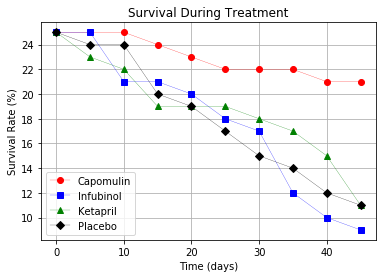

In [105]:
# Generate the Plot (Accounting for percentages)
plt.plot(reformat_mice_cout_df['Capomulin'],color="r",marker="o",linewidth=0.25, label="Capomulin")
plt.plot(reformat_mice_cout_df['Infubinol'],color="b",marker="s",linewidth=0.25, label="Infubinol")
plt.plot(reformat_mice_cout_df['Ketapril'],color="g",marker="^",linewidth=0.25, label="Ketapril")
plt.plot(reformat_mice_cout_df['Placebo'],color="k",marker="D",linewidth=0.25, label="Placebo")

plt.legend(loc="lowerleft")
plt.title("Survival During Treatment")
plt.grid()
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
 
# Save the Figure
plt.savefig("survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [106]:
# Calculate the percent changes for each drug
first_record = reformat_mean_combined_df.iloc[0]
last_record = reformat_mean_combined_df.iloc[-1]

perc_change_tumor = (((last_record-first_record)/ first_record)*100)

# Display the data to confirm
#print(f"{first_record} and {last_record} and {perc_change_tumor}")
perc_change_tumor

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

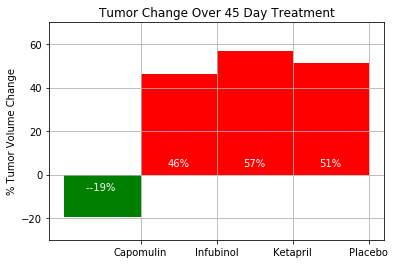

In [107]:
# Store all Relevant Percent Changes into a Tuple

pct_tuple = (perc_change_tumor['Capomulin'],
             perc_change_tumor['Infubinol'],
             perc_change_tumor['Ketapril'],
             perc_change_tumor['Placebo'])
# Splice the data between passing and failing drugs

fig, ax = plt.subplots()
ind = np.arange(len(pct_tuple))
width = 1
rectsPass = ax.bar(ind[0], pct_tuple[0], width, color='green')
rectsFail = ax.bar(ind[1:], pct_tuple[1:], width, color='red')

# Orient widths. Add labels, tick marks, etc. 

ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + 0.5)
ax.set_xticklabels(('Capomulin', 'Infubinol', 'Ketapril', 'Placebo'))
ax.set_autoscaley_on(False)
ax.set_ylim([-30,70])
ax.grid(True)

# Use functions to label the percentages of changes

def autolabelFail(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 3,
                '%d%%' % int(height),
                ha='center', va='bottom', color="white")
def autolabelPass(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., -8,
                '-%d%% ' % int(height),
                ha='center', va='bottom', color="white")

# Call functions to implement the function calls

autolabelFail(rectsFail)
autolabelPass(rectsPass)

# Save the Figure

plt.savefig("summary.png")

# Show the Figure
fig.show()

In [108]:
#Include 3 observations about the results of the study. Use the visualizations you generated from the study data as the basis for your observations

# observation01:
# Capomulin is the only Drug that effectively reduced the Tumor Volume (-19%)

# observation02:
# After 45 days of treatment over 80% of mices undergoing Capumolin surviced while mices undergoing
# other drugs had less then 45% survival rate

# observation03:
#Keptapril in as ineffective as placebo